In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
df = pd.read_csv('num.csv')
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['month'] = df['date'].dt.to_period('M')

In [3]:
df.groupby('cat')['amt'].sum().sort_values(ascending=False)

cat
Payment                        4000.00
Restaurant and Dining          1045.93
Shopping and Entertainment      834.24
Groceries                       460.56
Travel                          448.40
Personal Care                   389.55
Pet Care                         68.30
Education                        65.28
Donation                         50.00
Name: amt, dtype: float64

Good stuff

In [4]:
df.groupby('cat')['amt'].count().sort_values(ascending=False)

cat
Restaurant and Dining          39
Shopping and Entertainment     20
Travel                         17
Groceries                      16
Payment                        11
Personal Care                   8
Pet Care                        2
Education                       1
Donation                        1
Name: amt, dtype: int64

Taking weekly goals for Groceries, Restaurant & Dining, Shopping & Entertainment----> EACH = 100

In [0]:
din = df[df.cat == 'Restaurant and Dining '].groupby('date')['amt'].sum()
gr = df[df.cat == 'Groceries '].groupby('date')['amt'].sum()
sh = df[df.cat == 'Shopping and Entertainment '].groupby('date')['amt'].sum()

In [0]:
days = df.date.unique()

In [0]:
dins = []
grs = []
shop = []
for z in days:
    if z in din:
        dins.append(din[z])
    else:
        dins.append(0)
    if z in gr:
        grs.append(gr[z])
    else:
        grs.append(0)
    if z in sh:
        shop.append(sh[z])
    else:
        shop.append(0)

In [0]:
daily = pd.DataFrame({'din':dins, 'gr':grs, 'sh':shop})

In [0]:
daily['w_gr'] = daily['gr'].rolling(7).sum().shift(1)
daily['w_sh'] = daily['sh'].rolling(7).sum().shift(1)
daily['w_din'] = daily['din'].rolling(7).sum().shift(1)

In [0]:
daily['w_gr'] = daily['w_gr']/7
daily['w_sh'] = daily['w_sh']/7
daily['w_din'] = daily['w_din']/7

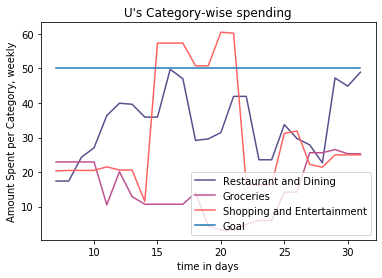

In [11]:
pl1 = plt.plot(daily['w_din'],c="#58508d")
pl2 = plt.plot(daily['w_gr'], c="#bc5090")
pl3 = plt.plot(daily['w_sh'], c="#ff6361")
pl4 = plt.plot(range(7,32),[50]*25)
plt.ylabel("Amount Spent per Category, weekly")
plt.xlabel("time in days")
plt.title("U's Category-wise spending")
plt.legend((pl1[0], pl2[0],pl3[0],pl4[0]), ('Restaurant and Dining', 'Groceries', 'Shopping and Entertainment','Goal'))
plt.show()